Test passed: The quantum state correctly encodes the real and imaginary parts.


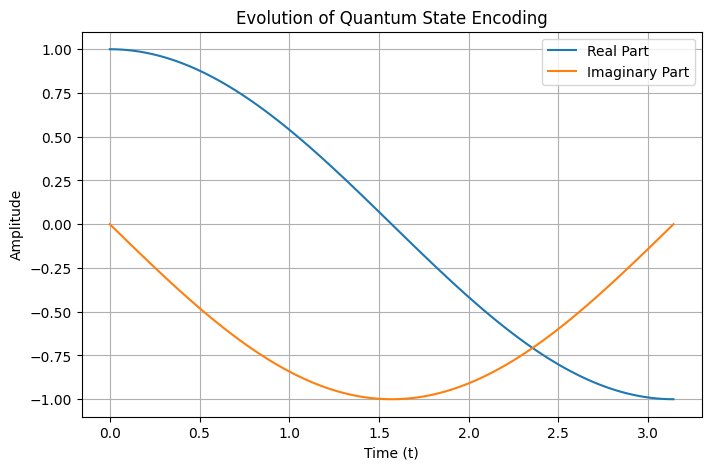

In [7]:
import numpy as np
from scipy.linalg import expm
import matplotlib.pyplot as plt

def complex_amplitude_encoding(a, b, t=np.pi/2):
    """
    Encodes two real numbers (a, b) into a quantum state using Hamiltonian evolution.

    Args:
        a (float): Real part to encode.
        b (float): Imaginary part to encode.
        t (float): Evolution time parameter (default is π/2 for proper transformation).

    Returns:
        np.ndarray: A quantum state with complex amplitude encoding (a in real, b in imaginary part).
    """
    # Construct the target complex amplitude
    norm = np.sqrt(a**2 + b**2)
    if norm == 0:
        raise ValueError("Both numbers cannot be zero.")
    target_state = (a + 1j * b) / norm
    
    # Define the Hamiltonian based on the target state
    v = np.array([target_state, np.sqrt(1 - np.abs(target_state)**2)])
    H = np.outer(v, v.conj())  # Projector onto the target state
    
    # Compute the unitary evolution operator U = exp(-i * H * t)
    U = expm(-1j * t * H)
    
    # Apply evolution to the initial state |0>
    initial_state = np.array([1.0, 0.0])  # Start in |0>
    evolved_state = U @ initial_state
    
    return evolved_state

def plot_evolution(a, b, timesteps=100):
    """
    Plots the evolution of the quantum state as it encodes (a, b).

    Args:
        a (float): Real part to encode.
        b (float): Imaginary part to encode.
        timesteps (int): Number of time steps for visualization.
    """
    times = np.linspace(0, np.pi, timesteps)
    real_parts = []
    imag_parts = []
    
    for t in times:
        state = complex_amplitude_encoding(a, b, t)
        real_parts.append(state[0].real)
        imag_parts.append(state[0].imag)
    
    plt.figure(figsize=(8, 5))
    plt.plot(times, real_parts, label='Real Part')
    plt.plot(times, imag_parts, label='Imaginary Part')
    plt.xlabel("Time (t)")
    plt.ylabel("Amplitude")
    plt.title("Evolution of Quantum State Encoding")
    plt.legend()
    plt.grid()
    plt.show()

def test_complex_amplitude_encoding():
    """
    Test function to verify that the two real numbers are encoded in the quantum state.
    """
    a, b = 0.6, 0.8  # Example real numbers
    encoded_state = complex_amplitude_encoding(a, b)
    
    # Expected quantum state
    expected_state = np.array([(a + 1j * b) / np.sqrt(a**2 + b**2), 0])
    
    # Verify the encoding by checking fidelity
    fidelity = np.abs(np.vdot(encoded_state, expected_state)) ** 2
    assert np.isclose(fidelity, 1.0, atol=1e-6), "Encoding failed! Fidelity is not close to 1."
    print("Test passed: The quantum state correctly encodes the real and imaginary parts.")

# Run the test function
test_complex_amplitude_encoding()

# Plot the evolution
plot_evolution(0.6, 0.8)
